In [2]:
"""Maximizng generalization using L2 weight regulization"""

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

#word_index is a dictionary mapping words to an integer index.
word_index = imdb.get_word_index()

#reverse_word_index reverse get_word_index, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
"""decoded_review decodes the review. the indices are offeset by 3 because 0,1,2 are reserved indices for padding,
staet of sequence and unknown """

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))#creates an  all zeros of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1. #sets specific indices of results[i] to 1s
    return results

#vectorize test data and train data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#vectrize the labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

#setting aside the validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#traiming the model
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 94ms/step - loss: 0.5600 - accuracy: 0.7648 - val_loss: 0.4255 - val_accuracy: 0.8405
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3331 - accuracy: 0.8935 - val_loss: 0.3168 - val_accuracy: 0.8834
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2388 - accuracy: 0.9220 - val_loss: 0.3051 - val_accuracy: 0.8771
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1864 - accuracy: 0.9400 - val_loss: 0.3007 - val_accuracy: 0.8794
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1502 - accuracy: 0.9530 - val_loss: 0.2785 - val_accuracy: 0.8874
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1239 - accuracy: 0.9631 - val_loss: 0.2877 - val_accuracy: 0.8893
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1004 - accuracy: 0.9720 - val_loss: 0.3012 - val_accuracy: 0.8847
Epoch 8/20
30

In [3]:
from tensorflow.keras import regularizers

#other ways you can use regulizers
#regulizers.l1(0.001) ==> L1 regulizeer
#regulizers.l1_l2(l1=0.001, l2=0.001) ==> simultaneous l1 and l2 regulization

model = keras.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation='relu'),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

#setting aside the validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#traiming the model
history_l2_reg = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 95ms/step - loss: 0.5929 - accuracy: 0.7860 - val_loss: 0.4666 - val_accuracy: 0.8686
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.4031 - accuracy: 0.8936 - val_loss: 0.4102 - val_accuracy: 0.8660
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3385 - accuracy: 0.9125 - val_loss: 0.3715 - val_accuracy: 0.8882
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3049 - accuracy: 0.9231 - val_loss: 0.3606 - val_accuracy: 0.8882
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2881 - accuracy: 0.9283 - val_loss: 0.3650 - val_accuracy: 0.8852
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2712 - accuracy: 0.9363 - val_loss: 0.3654 - val_accuracy: 0.8837
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2608 - accuracy: 0.9390 - val_loss: 0.3804 - val_accuracy: 0.8804
Epoch 8/20
30

<function matplotlib.pyplot.show(close=None, block=None)>

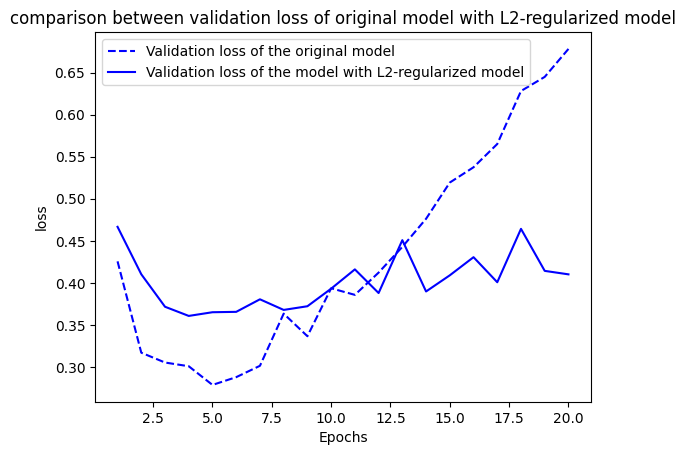

In [4]:
import matplotlib.pyplot as plt
loss_values = history.history['val_loss']
val_loss_values = history_l2_reg.history['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "b--", label='Validation loss of the original model')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss of the model with L2-regularized model')
plt.title('comparison between validation loss of original model with L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show